In [8]:
import cnot_network

from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sbs
import numpy as np
sbs.set_context("paper")
sbs.set_theme()
sbs.set_style("dark")

from surface_code_routing.tikz_utils import tikz, tex

sbs.set_style("whitegrid", {'grid.linestyle': '-.'})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

In [ ]:
cnot_rounds = 100
repeats = 10

counts = (10, 20, 30, 50)
heights = list(range(2, 21))

results = {i : {'height':[], 'runtime':[], 'volume':[], 'delay':[]} for i in counts}
for i in counts:
    for j in heights:
        print(f"\r{i} : {j}", flush=True, end='')
        for _ in range(repeats):
            qcb = cnot_network.cnot_network(n_qubits=i, height=j, width=i, n_rounds=cnot_rounds, teleport=True)
            results[i]['height'].append(j)
            results[i]['runtime'].append(qcb.n_cycles())
            results[i]['volume'].append(qcb.space_time_volume())
            results[i]['delay'].append(qcb.delays())

50 : 10

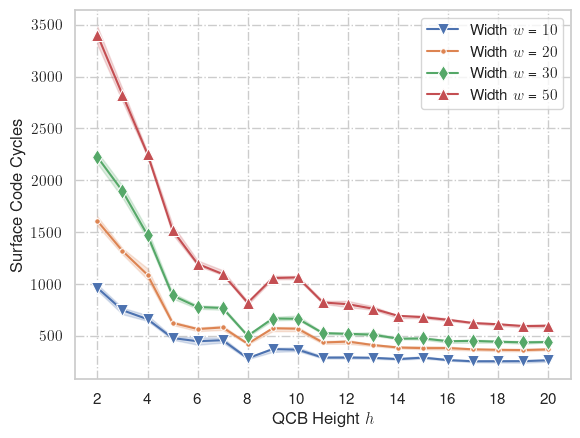

In [15]:
marks = ['v', '.', 'd', '^']
linestyles = ['-', '--', ':']
palette = sbs.color_palette()

plt.xlabel('QCB Height $h$')
plt.ylabel('Surface Code Cycles')

plt.xticks(
    heights[::2], 
    labels=heights[::2]
)

for idx, i in enumerate(counts):
    sbs.lineplot(x=results[i]['height'], y=np.array(results[i]['runtime']), label=f'Width $w$ = ${i}$', marker=marks[idx], markersize=8, errorbar=('pi', 100))

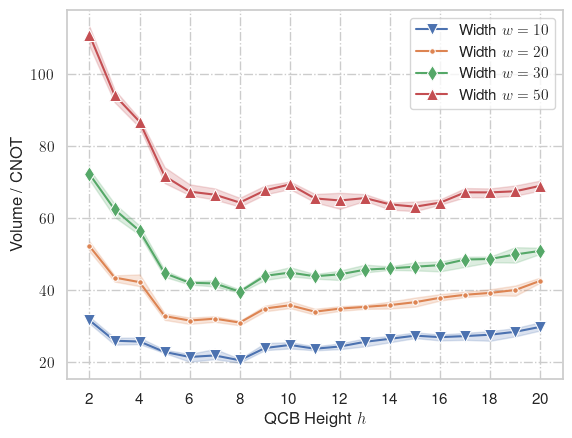

In [14]:

#locmin = mticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=20)  
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_formatter(mticker.NullFormatter())


marks = ['v', '.', 'd', '^']
linestyles = ['-', '--', ':']
palette = sbs.color_palette()

plt.xlabel('QCB Height $h$')
plt.ylabel('Volume / CNOT')

plt.xticks(
    heights[::2], 
    labels=heights[::2]
)

for idx, i in enumerate(counts):
    sbs.lineplot(x=results[i]['height'], y=np.array(results[i]['volume']) / (50 * i), label=f'Width $w = {i}$', marker=marks[idx], markersize=8, errorbar=('pi', 100))

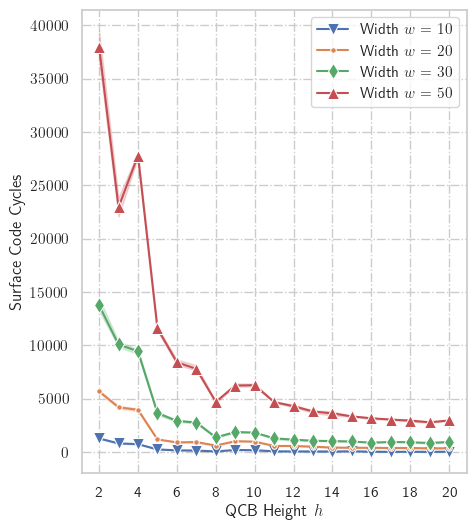

In [54]:
delta = 1
textwidth = 3.31314
aspect_ratio = 6/8
scale = 1.5
width = textwidth * scale
height = width * aspect_ratio + delta
plt.figure(figsize=(width, height))

#locmin = mticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=20)  
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_formatter(mticker.NullFormatter())
plt.grid(True, which="both")  


marks = ['v', '.', 'd', '^']
linestyles = ['-', '--', ':']
palette = sbs.color_palette()

plt.xlabel('QCB Height $h$')
plt.ylabel('Delays')

plt.xticks(
    heights[::2], 
    labels=heights[::2]
)

for idx, i in enumerate(counts):
    sbs.lineplot(x=results[i]['height'], y=np.array(results[i]['delay']), label=f'Width $w$ = ${i}$', marker=marks[idx], markersize=8, errorbar=('pi', 100))

#plt.title('Random CNOT Runtimes for a $h \\times w$ QCB')
plt.subplots_adjust(bottom=-0.1)
#ax.legend()
#plt.show()